# Beat Tracking with Librosa
---

-- Onset Detection and Dynamic Programming --

References:<br>
+ [Learn Audio Beat Tracking for Music Information Retrieval (with Python codes)](https://www.analyticsvidhya.com/blog/2018/02/audio-beat-tracking-for-music-information-retrieval/)<br>
+ [Onset detection in audio music, online tutorial given by J.-S Roger Jang](http://u.camdemy.com/media/471)

### Import Module

In [1]:
import pyaudio
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

### Step 1: Audio File Input

In [2]:
try:
    x, fs = librosa.load('demo.mp3') 
except:
    raise IOError("!!!!!!!!!!!!!!!!!!!!!!!!!")

### Step 2: Beat Tracking

In [3]:
tempo, beat_times = librosa.beat.beat_track(x, sr = fs, start_bpm = 30, units = 'time')
print ('tempo: ',tempo)
print ('beat times: ',beat_times)

tempo:  80.7495117188
beat times:  [  0.13931973   0.92879819   1.69505669   2.46131519   3.2275737
   3.9938322    4.7600907    5.50312925   6.2461678    7.0124263
   7.75546485   8.4985034    9.24154195  10.00780045  10.750839
  11.49387755  12.26013605  13.0031746   13.74621315  14.4892517
  15.23229025  15.99854875  16.7415873   17.48462585  18.2276644
  18.97070295  19.73696145  20.45678005  21.19981859  21.9660771
  22.75555556  23.4985941   24.26485261  25.00789116  25.75092971
  26.49396825  27.26022676  27.98004535  28.74630385]


In [4]:
clicks = librosa.clicks(beat_times, sr = fs, length = len(x))

In [5]:
data = x + clicks

### Step 3: Audio File Output

In [6]:
p = pyaudio.PyAudio()
stream = p.open(format = pyaudio.paFloat32, channels = 1, rate = fs, output = True)
stream.write(data.astype(np.float32).tostring())

### Plot the beat events against the onset strength envelope

In [7]:
# Track beats using a pre-computed onset envelope
onset_env = librosa.onset.onset_strength(x, sr=fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=fs)
print ('tempo: ',tempo)
print ('the first 20 beat frames: ',beats[:20])

tempo:  80.7495117188
the first 20 beat frames:  [  6  40  73 106 139 172 205 237 269 302 334 366 398 431 463 495 528 560
 592 624]


beat times:  [  0.13931973   0.92879819   1.69505669   2.46131519   3.2275737
   3.9938322    4.7600907    5.50312925   6.2461678    7.0124263
   7.75546485   8.4985034    9.24154195  10.00780045  10.750839
  11.49387755  12.26013605  13.0031746   13.74621315  14.4892517
  15.23229025  15.99854875  16.7415873   17.48462585  18.2276644
  18.97070295  19.73696145  20.45678005  21.19981859  21.9660771
  22.75555556  23.4985941   24.26485261  25.00789116  25.75092971
  26.49396825  27.26022676  27.98004535  28.74630385]


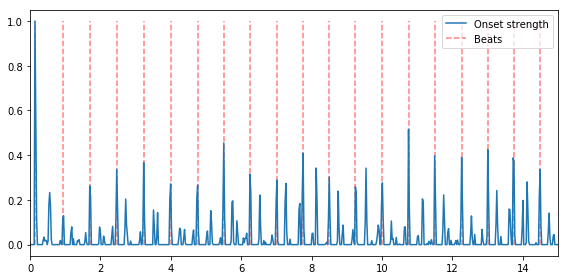

In [8]:
hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
print ('beat times: ',times[beats])
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 15-second window
plt.xlim(0, 15)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()
plt.show()